---------------------- SCIANN 0.6.0.3 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 



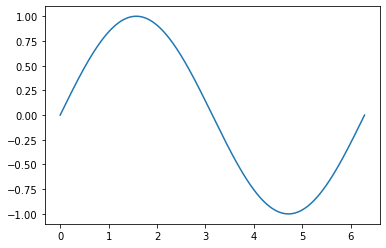

In [1]:
# https://www.sciann.com/examples/example-fitting-1d/
import numpy as np
from sciann import Variable, Functional, SciModel, Parameter
from sciann.constraints import Data, MinMax
from sciann.utils.math import diff
import sciann as sn
import matplotlib.pyplot as plt

sn.set_random_seed(1234)
# Synthetic data generated from sin function over [0, 2pi]
x_true = np.linspace(0, np.pi*2, 10000)
y_true = np.sin(x_true)

# The network inputs should be defined with Variable.
x = Variable('x', dtype='float64')

# Each network is defined by Functional.
y = Functional('y', x, [10, 10, 10], activation='l-tanh', res_net=True)

d = Parameter(10.0, inputs=x, name='d')

# Define the target (output) of your model.
c1 = Data(y)

L = d*diff(y, x, order=2) + y

# The model is formed with input `x` and condition `c1`.
model = SciModel(x, [c1, sn.PDE(L)])

plt.plot(x_true,y_true)

In [2]:
# Training: .train runs the optimization and finds the parameters.
history = model.train(
    x_true,
    [y_true, 'zeros'],
    batch_size=32,
    epochs=100,
    adaptive_weights=True,
    log_parameters=[d]
)

Train on 10000 samples

+ adaptive_weights at epoch 1: [6.59307568657169, 1.1787925027370685]
Epoch 1/100
10000/10000 [==============================] - 1s 62us/sample - loss: 1.7118 - y_loss: 0.2405 - add_loss: 0.1062
Epoch 2/100
10000/10000 [==============================] - 1s 62us/sample - loss: 1.1287 - y_loss: 0.1658 - add_loss: 0.0312
Epoch 3/100
10000/10000 [==============================] - 1s 61us/sample - loss: 1.1219 - y_loss: 0.1649 - add_loss: 0.0296
Epoch 4/100
10000/10000 [==============================] - 1s 59us/sample - loss: 1.1139 - y_loss: 0.1636 - add_loss: 0.0297
Epoch 5/100
10000/10000 [==============================] - 1s 65us/sample - loss: 1.1071 - y_loss: 0.1626 - add_loss: 0.0304
Epoch 6/100
10000/10000 [==============================] - 1s 63us/sample - loss: 1.0944 - y_loss: 0.1602 - add_loss: 0.0322
Epoch 7/100
10000/10000 [==============================] - 1s 63us/sample - loss: 1.0860 - y_loss: 0.1585 - add_loss: 0.0345
Epoch 8/100
10000/10000 [======

10000/10000 [==============================] - 1s 61us/sample - loss: 5.2625e-04 - y_loss: 6.8957e-05 - add_loss: 6.0058e-05
Epoch 62/100
10000/10000 [==============================] - 1s 60us/sample - loss: 6.4213e-06 - y_loss: 1.0024e-07 - add_loss: 4.8859e-06
Epoch 63/100
10000/10000 [==============================] - 1s 62us/sample - loss: 6.6936e-06 - y_loss: 1.1636e-07 - add_loss: 5.0260e-06
Epoch 64/100
10000/10000 [==============================] - 1s 62us/sample - loss: 9.0544e-06 - y_loss: 4.6752e-07 - add_loss: 5.0668e-06
Epoch 65/100
10000/10000 [==============================] - 1s 61us/sample - loss: 7.8186e-05 - y_loss: 9.6259e-06 - add_loss: 1.2786e-05
Epoch 66/100
10000/10000 [==============================] - 1s 62us/sample - loss: 1.3588e-04 - y_loss: 1.6991e-05 - add_loss: 2.0067e-05
Epoch 67/100
10000/10000 [==============================] - 1s 61us/sample - loss: 7.0321e-05 - y_loss: 8.1604e-06 - add_loss: 1.3925e-05
Epoch 68/100
10000/10000 [=====================

In [3]:
# used to evaluate the model after the training.
y_pred = y.eval(model, x_true)
d_pred = d.eval(model, x_true)

Input and output dimensions need re-adjustment for post-processing.


In [22]:
x_true = np.linspace(-1, 1+np.pi*2, 10000)
result = model.predict(x_true)

In [23]:
print(result[0])

[-0.46905985 -0.46916989 -0.46927946 ...  0.8416739   0.8421658
  0.84265733]


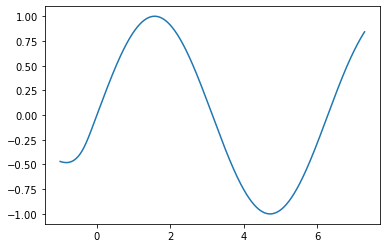

In [24]:
plt.plot(x_true,result[0])

In [16]:

x_test = np.linspace(0, np.pi*2, 50)
'''
for i in range(len(x_test)):
    print(x_test[i]," != ",x_true[i])
    '''
y_test = model.predict(x_test)
#plt.plot(y_test[0],y_test[1])

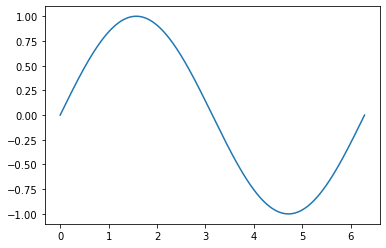

In [17]:
plt.plot(x_true,y_true)

In [17]:
#print(y.get_weights())
#print(L)